## Calculate the rate of change of mass

In [1]:
%load_ext autoreload
%autoreload 2
import so_decadal_variability.process as process
import so_decadal_variability.wmt as wmt
import numpy as np
from xhistogram.xarray import histogram
import xarray as xr
from dask.diagnostics import ProgressBar

In [2]:
oceanname = 'en4'
timeslice = slice('1979','2018')
save=False
dg = 0.1
gn_edges = np.arange(1026,1028.5,dg)
# Resolve to mid-points
gn_edges = 0.5*(gn_edges[1:]+gn_edges[:-1])

ds = process.loaddata_oceanonly(oceanname='en4',timeslice=timeslice)
ds['mass'] = ds['rho']*ds['vol4d']
dMdt = wmt.calc_dMdt(ds,gn_edges)
if save:
    with ProgressBar():
        dMdt.to_netcdf('../data/processed/'+oceanname+'/dMdt_'+str(dg))

In [3]:
with ProgressBar():
    dMdt.load()

[########################################] | 100% Completed | 15.5s


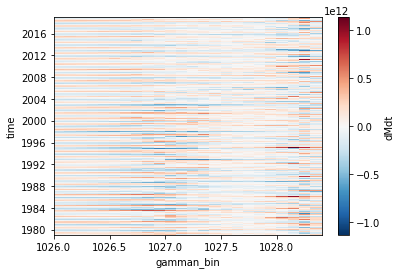

In [4]:
dMdt.plot()